# Homework 2: Predicting the COVID-19 Peak
In this homework, we are going to use regression to learn the infection curve of the COVID-19 in the US, and help answer the following questions

1. When the US will reach the peak of COVID-19 cases?
2. How many people are estimated to be infected in the US?
3. Have we passed the inflection point？

Add your code to the following sections in the template.
```python

    ## add your code here
    
    ##
```

### Student information
    1. Your name: Amanda Ward
    2. Department: Computer Science
    3. Graduate

### TA grading: XX/100
    1. 1?/10
    2. 2?/30
    3. 3: ?/10
    4. 4: ?/30
    5. 5: ?/20

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

from datetime import datetime,timedelta

In [2]:
# load data from JHU CSSE 
# https://github.com/CSSEGISandData/COVID-19
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
df_confirmed=pd.read_csv(url_confirmed, index_col=[0,1,2,3])
df_confirmed

1/22/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/23/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/24/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         24.215500 -12.885800        0   
                          Sao Tome and Principe  0.186360   6.613081         0   
                          Yemen                  15.552727  48.516388        0   

                                                                       1/25/20  \
Province/State            Country/Region        Lat        Long                  
NaN                       Afghanistan            33.000000  65.000000        0   
                          Albania                41.153300  20.168300        0   
                          Algeria                28.033900  1.659600         0   
                          Andorra                42.506300  1.521800         0   
                          Angola                -11.202700  17.873900        0   
...                                                                        ...   
Saint Pierre and Miquelon France                 46.885200 -56.315900        0   
NaN                       South Sudan            6.877000   31.307000        0   
                          Western Sahara         2

In [3]:
# show the date range
dates= [datetime.strptime(d, '%m/%d/%y') for d in df_confirmed.columns.values]
date_range = pd.DatetimeIndex(dates)
date_range
print(date_range [-1])

2020-04-19 00:00:00


In [4]:
# Select data from a list of countries
# Using at least 100 cases to define the outbreak of COVID-19 in a country

all_countries = np.unique(df_confirmed.index.get_level_values('Country/Region').values)
min_cases = 100 # Using at least 100 cases to define the outbreak of COVID-19 in a country

cases = {}
confirmed_selected = {}
for country in all_countries:
    cou = df_confirmed.loc[pd.IndexSlice[:, country], :].sum()
    cases[country] = cou[cou > min_cases] 
    dates = [datetime.strptime(date, '%m/%d/%y') for date in cases[country].index]
    confirmed_selected[country] = pd.DataFrame(cases[country], columns=['Cases'], index=dates)
    confirmed_selected[country]['DayCount'] = np.arange(1,cases[country].shape[0]+1)
    print(country)
    if len(cases[country]) > 0:
        print(' Outbreak:', confirmed_selected[country].index[0], 'Current cases: ',\
              confirmed_selected[country]['Cases'][-1])

Afghanistan
 Outbreak: 2020-03-27 00:00:00 Current cases:  996
Albania
 Outbreak: 2020-03-23 00:00:00 Current cases:  562
Algeria
 Outbreak: 2020-03-21 00:00:00 Current cases:  2629
Andorra
 Outbreak: 2020-03-22 00:00:00 Current cases:  713
Angola
Antigua and Barbuda
Argentina
 Outbreak: 2020-03-20 00:00:00 Current cases:  2839
Armenia
 Outbreak: 2020-03-19 00:00:00 Current cases:  1291
Australia
 Outbreak: 2020-03-10 00:00:00 Current cases:  6547
Austria
 Outbreak: 2020-03-08 00:00:00 Current cases:  14749
Azerbaijan
 Outbreak: 2020-03-26 00:00:00 Current cases:  1398
Bahamas
Bahrain
 Outbreak: 2020-03-10 00:00:00 Current cases:  1881
Bangladesh
 Outbreak: 2020-04-06 00:00:00 Current cases:  2456
Barbados
Belarus
 Outbreak: 2020-03-30 00:00:00 Current cases:  4779
Belgium
 Outbreak: 2020-03-06 00:00:00 Current cases:  38496
Belize
Benin
Bhutan
Bolivia
 Outbreak: 2020-03-31 00:00:00 Current cases:  520
Bosnia and Herzegovina
 Outbreak: 2020-03-22 00:00:00 Current cases:  1285
Botswana


C:\Users\amanda\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


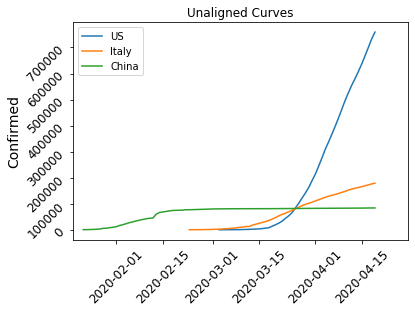

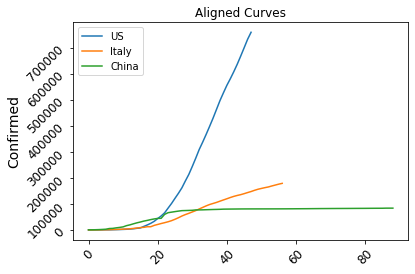

In [5]:
#1. plot the infection curves. 10 points

# plot the raw records of ['US', 'Italy','China'] with un-aligned date
countries = ['US', 'Italy','China']
for country in countries:
    dates=confirmed_selected[country].index
    plt.plot(dates, np.array(list(confirmed_selected[country]['Cases'].values)), label=country)
    plt.legend(loc='upper left')
    plt.tick_params(rotation=45, labelsize=12)
    plt.ylabel('Confirmed', fontsize=14)
plt.xlim([dates[0]-np.timedelta64(3,'D'), dates[-1]+np.timedelta64(10,'D')])
plt.title('Unaligned Curves')
plt.show()

# plot the records of ['US', 'Italy','China'] with aligned outbreak date (from day 1 to current day)
## add your code here. 10 points
countries = ['US', 'Italy','China']
for country in countries:
    plt.plot( np.array(list(confirmed_selected[country]['Cases'].values)), label=country)
    plt.legend(loc='upper left')
    plt.tick_params(rotation=45, labelsize=12)
    plt.ylabel('Confirmed', fontsize=14)   
plt.title('Aligned Curves')
plt.show()
##


(-1000, 150000)

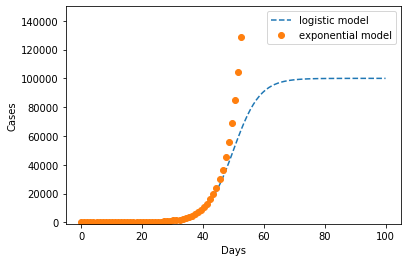

In [6]:
#2. implement the logistic and exponential models. 30 points

# 2.1 complete the logistic function. 10 points
def logistic_model(x,a,b,n):
    '''the logistic model
    
        parameters
        ----------
        x: input day
        a: 1/growth rate
        b: inflection point
        n: possible max cases
        
        return
        log_model
    '''
    ## add your code here

    log_model = n / (1 + np.exp(-(1/a)*(x-b)))

    return log_model
    ##
    
#2.2 complete the exponential function. 10 points
def exp_model(x,p,N0=3,X0=1):
    '''the logistic model

        parameters
        ----------
        x: input day
        p: growth rate
        N0: initial case for day 1
        X0: starting day
        
        return
            exp_model
    '''
    ## add your code here
    
    exp_model = N0*(1+p)**(x-X0)

    return exp_model
    ##

# 2.3 plot the the logistic and exponential functions with growth rate 0.23. 10 points
# logistic_model(x, 1/0.23, 50, 100000)
# exp_model(x, 0.23)

x= np.linspace(0,100,100) #input of the horizontal axis 
## add your code here

show_log = logistic_model(x, 1/0.23, 50, 100000)
show_exp = exp_model(x, 0.23)
fig=plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, show_log, '--', label='logistic model')
ax.plot(x, show_exp, 'o', label='exponential model')

##
plt.legend()
plt.xlabel('Days')
plt.ylabel('Cases')
plt.ylim(-1000,150000)


In [7]:
# select US data and prepare the traing and test dataset
# US confirmed cases from the outbreak date
country = 'US'
print(confirmed_selected[country])

# training and test data
leaveout = -3 # leave out 5 days for test 
x_train = np.array(list(confirmed_selected[country]['DayCount'].values))[:leaveout]
y_train = np.array(list(confirmed_selected[country]['Cases'].values))[:leaveout]    

x_test = np.array(list(confirmed_selected[country]['DayCount'].values))[leaveout:]
y_test = np.array(list(confirmed_selected[country]['Cases'].values))[leaveout:]

             Cases  DayCount
2020-03-03     118         1
2020-03-04     149         2
2020-03-05     217         3
2020-03-06     262         4
2020-03-07     402         5
2020-03-08     518         6
2020-03-09     583         7
2020-03-10     959         8
2020-03-11    1281         9
2020-03-12    1663        10
2020-03-13    2179        11
2020-03-14    2727        12
2020-03-15    3499        13
2020-03-16    4632        14
2020-03-17    6421        15
2020-03-18    7783        16
2020-03-19   13747        17
2020-03-20   19273        18
2020-03-21   25600        19
2020-03-22   33276        20
2020-03-23   43843        21
2020-03-24   53736        22
2020-03-25   65778        23
2020-03-26   83836        24
2020-03-27  101657        25
2020-03-28  121465        26
2020-03-29  140909        27
2020-03-30  161831        28
2020-03-31  188172        29
2020-04-01  213372        30
2020-04-02  243762        31
2020-04-03  275586        32
2020-04-04  308853        33
2020-04-05  33

In [8]:
#3. train the logistic model curve_fit in scipy.optimize and print out the parameters (a, b, n). 10 points
from scipy.optimize import curve_fit

print('Train the logistic model')
## add your code here

popt, pcov = curve_fit(logistic_model, x_train, y_train)
a, b, n= popt

y_fitted = logistic_model(x_train, a, b, n)
print(a, b, n)

##

Train the logistic model
5.4083753461769986 35.28175689944598 756337.0553158427


In [9]:
# 4. prediction and evaulation. 30 points
import sklearn.metrics as sklm

# 4.1 complete the following evaluate function to calculate the mean squared log error, 
# mean squared error and the R^2. 10 points
def my_evaluation(y, y_pred):
    ## add your code here
    mse = round(sklm.mean_squared_error(y, y_pred), 3)
    mse_log = round(sklm.mean_squared_log_error(y, y_pred),3)
    r2 = round(sklm.r2_score(y, y_pred), 3)
    ##
    return mse, mse_log, r2

# 4.2 calculate and print out the mse, mse_log and r2 for both the training and test sets. 20 points
## add your code here

y = logistic_model(x_train, a, b, n)
y_pred = logistic_model(x_test, a, b, n)

mse, mse_log, r2 = my_evaluation(y_train, y)
print("mse, mse_log, and r2 for training set:")
print(mse)
print(mse_log)
print(r2)


mse2,mse_log2, r22 = my_evaluation(y_test, y_pred)
print("mse, mse_log, and r2 for test set:")
print(mse2)
print(mse_log2)
print(r22)


##

mse, mse_log, and r2 for training set:
52967231.63
1.066
0.999
mse, mse_log, and r2 for test set:
2929828078.332
0.006
-3.971


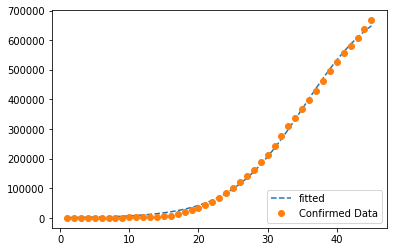

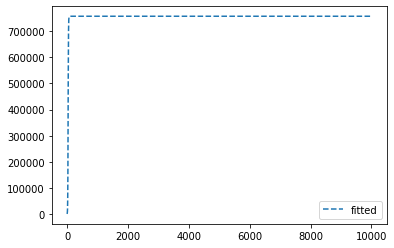

The max cases is estimated to be:  756337.0553158427
the date this max will be reached is 2020-10-23 00:33:41.962196


In [40]:
# 5. Results visualization. 20 ponts
# 5.1. plot the real infection curve vs. the predicted infection curve
# 5.2. print out the estimated total number of COVID-19 cases that will be confirmed and 
# print out the date that we will reach the end (max number) 

# 5.1 curves. 10 points
## add your code here

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_train, y_fitted, '--', label='fitted')
ax.plot(x_train, y_train, 'o', label='Confirmed Data')
plt.legend(loc='lower right') 
plt.show()



x= np.linspace(0,10000,10000) 
y = logistic_model(x, a, b, n)
fig = plt.figure()
af = fig.add_subplot(111)
af.plot(x, y, '--', label='fitted')
#af.plot(x, y_train, 'o', label='Confirmed Data')
plt.legend(loc='lower right') 
plt.show()
#
# 5.2 estimated total number and when. 10 points
## add your code here

print("The max cases is estimated to be: ",n)

xmax = x[np.argmax(y)]

all_dates = confirmed_selected['US'].index
start_date = all_dates[0]

end_date = start_date + timedelta(days=xmax)
print("the date this max will be reached is", end_date)

##